In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn
from sklearn import model_selection, tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sn
from pandas.plotting import scatter_matrix

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Digraph

In [2]:
#  Import and read data
heart_df = pd.read_csv("Heart_Disease_Prediction.csv")
heart_df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [3]:
# Checking shape 
heart_df.shape

(270, 14)

In [4]:
# checking missing value
heart_df.isnull().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
# Chekcing duplicates
format(len(heart_df[heart_df.duplicated()]))

'0'

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

<function matplotlib.pyplot.show(close=None, block=None)>

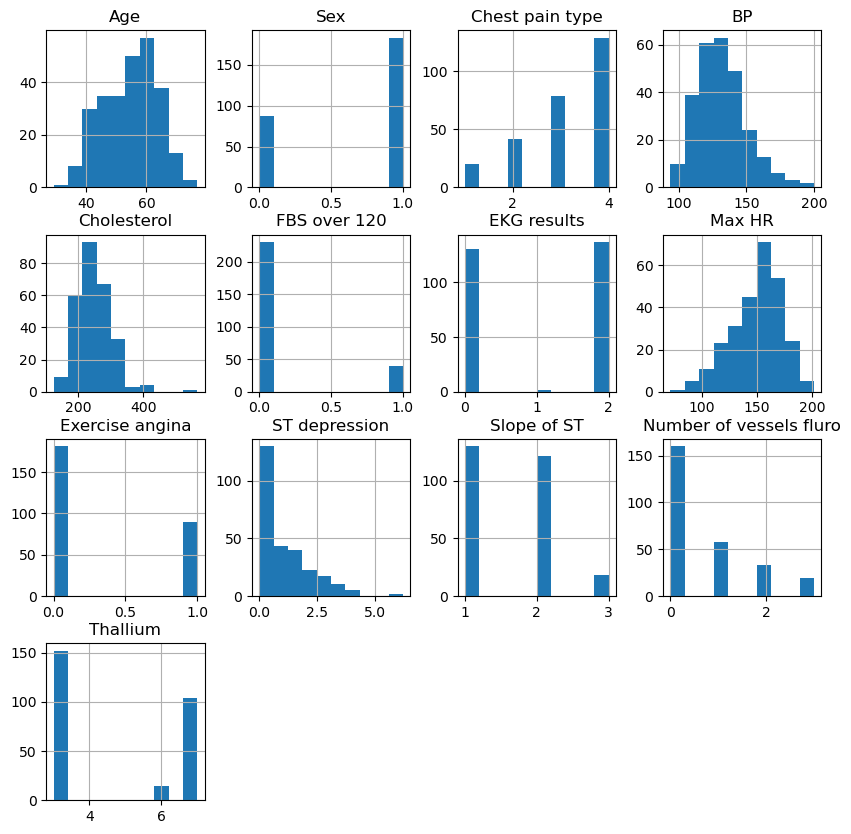

In [7]:
heart_df.hist(figsize = (10, 10))
plt.show

In [8]:
# Determine the number of unique values in each column.
heart_df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [9]:
heart_df.value_counts()

Age  Sex  Chest pain type  BP   Cholesterol  FBS over 120  EKG results  Max HR  Exercise angina  ST depression  Slope of ST  Number of vessels fluro  Thallium  Heart Disease
29   1    2                130  204          0             2            202     0                0.0            1            0                        3         Absence          1
59   1    4                170  326          0             2            140     1                3.4            3            0                        7         Presence         1
58   1    4                128  259          0             2            130     1                3.0            2            2                        7         Presence         1
                           146  218          0             0            105     0                2.0            2            1                        7         Presence         1
                           150  270          0             2            111     1                0.8          

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
st_slope = heart_df['Slope of ST']
st_slope

0      2
1      2
2      1
3      2
4      1
      ..
265    1
266    1
267    2
268    2
269    2
Name: Slope of ST, Length: 270, dtype: int64

In [11]:
st_dummies = pd.get_dummies(st_slope)
st_dummies.rename(columns={ 1: 'ST upsloaping', 2: 'ST flat', 3: 'ST downsloaping'}, inplace =True)
st_dummies

,ST upsloaping,ST flat,ST downsloaping
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
265,1,0,0
266,1,0,0
267,0,1,0
268,0,1,0


In [12]:
chest_pain = heart_df['Chest pain type']
chest_pain

0      4
1      3
2      2
3      4
4      2
      ..
265    3
266    2
267    2
268    4
269    4
Name: Chest pain type, Length: 270, dtype: int64

In [13]:
chest_pain_dummies = pd.get_dummies(chest_pain)
chest_Df = chest_pain_dummies.rename(columns={ 1: 'typical angina', 2:  'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'})
chest_Df

,typical angina,atypical angina,non-anginal pain,asymptomatic
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
265,0,0,1,0
266,0,1,0,0
267,0,1,0,0
268,0,0,0,1


In [14]:
thallium = heart_df['Thallium']
thallium

0      3
1      7
2      7
3      7
4      3
      ..
265    7
266    7
267    3
268    6
269    3
Name: Thallium, Length: 270, dtype: int64

In [15]:
thallium_dummies = pd.get_dummies(thallium)
thallium_dummies.rename(columns={ 3: 'thallium normal', 6:  'thallium fixed defect', 7: 'thallium reversable defect'}, inplace=True)
thallium_dummies

,thallium normal,thallium fixed defect,thallium reversable defect
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
265,0,0,1
266,0,0,1
267,1,0,0
268,0,1,0


In [16]:
h_disease = heart_df['Heart Disease']
h_disease

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

In [17]:
# Encoding the Heart Disease column using a custom function
def encode_h_disease(h_disease):
    """
    This function encodes marital status by setting yes as 1 and no as 0.
    """
    if h_disease == "Presence":
        return 1
    else:
        return 0

# Call the Heart Disease function on the HD column
heart_df['Heart Disease'] = heart_df['Heart Disease'].apply(encode_h_disease)

# Review the DataFrame 
heart_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [18]:
# Confirm the new values
heart_df['Heart Disease']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [19]:
#Drop the old categorical data columns
Z = heart_df.copy()
Z_1 = Z.drop(columns=["Chest pain type","Slope of ST", "Thallium"])
Z_1

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease
0,70,1,130,322,0,2,109,0,2.4,3,1
1,67,0,115,564,0,2,160,0,1.6,0,0
2,57,1,124,261,0,0,141,0,0.3,0,1
3,64,1,128,263,0,0,105,1,0.2,1,0
4,74,0,120,269,0,2,121,1,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,172,199,1,0,162,0,0.5,0,0
266,44,1,120,263,0,0,173,0,0.0,0,0
267,56,0,140,294,0,2,153,0,1.3,0,0
268,57,1,140,192,0,0,148,0,0.4,0,0


In [20]:
#Add the dummies data
dummies_df = chest_Df.join([st_dummies, thallium_dummies], on=None, how='left')
dummies_df

,typical angina,atypical angina,non-anginal pain,asymptomatic,ST upsloaping,ST flat,ST downsloaping,thallium normal,thallium fixed defect,thallium reversable defect
0,0,0,0,1,0,1,0,1,0,0
1,0,0,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0,1
4,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
265,0,0,1,0,1,0,0,0,0,1
266,0,1,0,0,1,0,0,0,0,1
267,0,1,0,0,0,1,0,1,0,0
268,0,0,0,1,0,1,0,0,1,0


In [21]:
#Join for a complete df
Z_N = Z_1.join([dummies_df], on=None, how='left')
Z_N

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,typical angina,atypical angina,non-anginal pain,asymptomatic,ST upsloaping,ST flat,ST downsloaping,thallium normal,thallium fixed defect,thallium reversable defect
0,70,1,130,322,0,2,109,0,2.4,3,...,0,0,0,1,0,1,0,1,0,0
1,67,0,115,564,0,2,160,0,1.6,0,...,0,0,1,0,0,1,0,0,0,1
2,57,1,124,261,0,0,141,0,0.3,0,...,0,1,0,0,1,0,0,0,0,1
3,64,1,128,263,0,0,105,1,0.2,1,...,0,0,0,1,0,1,0,0,0,1
4,74,0,120,269,0,2,121,1,0.2,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,172,199,1,0,162,0,0.5,0,...,0,0,1,0,1,0,0,0,0,1
266,44,1,120,263,0,0,173,0,0.0,0,...,0,1,0,0,1,0,0,0,0,1
267,56,0,140,294,0,2,153,0,1.3,0,...,0,1,0,0,0,1,0,1,0,0
268,57,1,140,192,0,0,148,0,0.4,0,...,0,0,0,1,0,1,0,0,1,0


In [22]:
# Check the accuracy of the transformed dataframe
Z_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         270 non-null    int64  
 1   Sex                         270 non-null    int64  
 2   BP                          270 non-null    int64  
 3   Cholesterol                 270 non-null    int64  
 4   FBS over 120                270 non-null    int64  
 5   EKG results                 270 non-null    int64  
 6   Max HR                      270 non-null    int64  
 7   Exercise angina             270 non-null    int64  
 8   ST depression               270 non-null    float64
 9   Number of vessels fluro     270 non-null    int64  
 10  Heart Disease               270 non-null    int64  
 11  typical angina              270 non-null    uint8  
 12  atypical angina             270 non-null    uint8  
 13  non-anginal pain            270 non

In [23]:
hd_dummies = Z_N['Heart Disease']
hd_dummies.nunique()

2

In [24]:
# Define features set
X = Z_N.copy()
X.drop(['Heart Disease'], axis=1, inplace=True)
X.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,typical angina,atypical angina,non-anginal pain,asymptomatic,ST upsloaping,ST flat,ST downsloaping,thallium normal,thallium fixed defect,thallium reversable defect
0,70,1,130,322,0,2,109,0,2.4,3,0,0,0,1,0,1,0,1,0,0
1,67,0,115,564,0,2,160,0,1.6,0,0,0,1,0,0,1,0,0,0,1
2,57,1,124,261,0,0,141,0,0.3,0,0,1,0,0,1,0,0,0,0,1
3,64,1,128,263,0,0,105,1,0.2,1,0,0,0,1,0,1,0,0,0,1
4,74,0,120,269,0,2,121,1,0.2,1,0,1,0,0,1,0,0,1,0,0


In [25]:
# Define target vector
y = hd_dummies.values.reshape(-1,1)
y[:5]

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [26]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [27]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [28]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [29]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [30]:
# Creating the decision tree classifier instance
model = DecisionTreeClassifier()



In [31]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [32]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0])

In [33]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [34]:
# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.7058823529411765
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        35
           1       0.69      0.73      0.71        33

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.71      0.71      0.71        68



In [35]:
# Set parameters using max_depth, criterion, quality and strategy of split at each node 
parameters = {'max_depth' : [3,5,7,9,10,15,20,25]
              , 'criterion' : ['gini', 'entropy']
              , 'max_features' : ['auto', 'sqrt', 'log2']
              , 'min_samples_split' : [2,4,6]
             }

In [36]:
# Use RandomizedSearchCV to set of hyperparameters
DT_grid  = GridSearchCV(DecisionTreeClassifier(), param_grid= parameters, verbose = 2)

In [37]:
# Fit to data
model_ = DT_grid.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=6; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=6; total tim

In [38]:
# Get the predictions
DT_grid.predict(X_test)

/Users/gussiepoole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [39]:
# Use best_estimator to get best parameters
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       min_samples_split=6)

In [40]:
# Display best Parameters
Grid_Df = pd.DataFrame(DT_grid.cv_results_)
Grid_Df[Grid_Df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
80,0.000237,0.000008,0.000123,8.203817e-07,entropy,3,log2,6,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.731707,0.878049,0.75,0.9,0.875,0.826951,0.071061,1


In [ ]:
# Display the Tree 
fig = plt.figure(figsize=(50,50))
tree.plot_tree(model)
plt.show()

In [41]:
# Print accuracy scores
print (f'Train Accuracy - : {DT_grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.777
Test Accuracy - : 0.721


/Users/gussiepoole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/gussiepoole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [42]:
# Calculating the accuracy score
acc_score_DT = accuracy_score(y_test, DT_grid.predict(X_test))
print(f"Accuracy Score : {acc_score_DT}")
print("Classification Report")
print(classification_report(y_test, DT_grid.predict(X_test)))

Accuracy Score : 0.7205882352941176
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.89      0.77        35
           1       0.82      0.55      0.65        33

    accuracy                           0.72        68
   macro avg       0.75      0.72      0.71        68
weighted avg       0.74      0.72      0.71        68



/Users/gussiepoole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/gussiepoole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# View the tree diagram (1)
dot_data = export_graphviz(model,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=['1','0'],      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Model 1")
graph 




In [ ]:
# Widen the parameters for GridSearch to see if we can achieve better scores 
parameters_2 = {'max_depth' : range(3,26)
              , 'criterion' : ['gini', 'entropy', 'log_loss']
              , 'max_features' : ['auto', 'sqrt', 'log2']
              , 'min_samples_split' : [2, 3, 4, 5, 6]
             }

In [ ]:
# Use GridSearchC to set of hyperparameters
DT_grid_2  = GridSearchCV(DecisionTreeClassifier(), param_grid= parameters_2, verbose = 2)

In [ ]:
# Fit the model
model_2 = DT_grid_2.fit(X_train_scaled,y_train)

In [ ]:
# Make the predictions
DT_grid_2.predict(X_test)

In [ ]:
# Display the best parameters
DT_grid_2.best_estimator_

In [ ]:
# Print the score
print (f'Train Accuracy - : {DT_grid_2.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_grid_2.score(X_test,y_test):.3f}')

In [ ]:
# Display the Classification Report
acc_score_DT_2 = accuracy_score(y_test, DT_grid_2.predict(X_test))
print(f"Accuracy Score : {acc_score_DT_2}")
print("Classification Report")
print(classification_report(y_test, DT_grid_2.predict(X_test)))

In [ ]:
# Display the paramters 
Grid_Df_2 = pd.DataFrame(DT_grid_2.cv_results_)
Grid_Df_2[Grid_Df_2['rank_test_score'] == 1]